## Introduction
Traffic Flow Prediction (TFP) is the process of forecasting the volume and density of traffic to optimize vehicle movement, reduce congestion, and create efficient routes that minimize time and energy consumption. With the advancements in Artificial Intelligence (AI), Machine Learning (ML), Deep Learning (DL), and Big Data, TFP research has grown significantly, playing a crucial role in Intelligent Transportation Systems (ITS).

ITS aims to address complex traffic management challenges in urban areas by leveraging predictive models to reduce costs associated with traffic congestion. Many countries have adopted ITS frameworks to enhance transportation efficiency, reduce travel times, and mitigate environmental impacts.

This project focuses on the application of Deep Learning techniques for TFP, comparing their performance with conventional ML methods. DL models simplify data preprocessing and outperform traditional ML approaches in accuracy, making them ideal for data-driven TFP applications.

##About the Dataset
The dataset offers vital information about factors influencing traffic flow, enabling the development of accurate traffic volume prediction models. Key features include:

Time: Timestamp of the recorded data.
Weather Conditions: Information such as temperature, precipitation, and visibility.
Holiday Information: Flags indicating public holidays that may impact traffic.
Other Contextual Factors: Additional details contributing to traffic flow variations.
These features are used to predict traffic volume at a specific point in time.

Dataset Files
Train.csv:
Contains historical traffic data, including traffic volume and the associated features. This file will be used to train the predictive model.

Test.csv:
Includes the dataset for which traffic predictions will be generated. This file is used for model evaluation and prediction.

By leveraging this dataset, the project aims to create a highly accurate traffic forecasting model, contributing to better traffic management and planning systems.

In [1]:
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/hackathon/Train.csv")
test_df=pd.read_csv("/content/drive/MyDrive/hackathon/Test.csv")


## Understanding the Data and statistical analysis


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38373 entries, 0 to 38372
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Holiday             50 non-null     float64
 1   Temperature         38373 non-null  float64
 2   Rainfall_last_hour  38373 non-null  float64
 3   Snowfall_last_hour  38373 non-null  float64
 4   Cloud_Cover         38373 non-null  int64  
 5   Weather             38373 non-null  object 
 6   Weather_Desc        38373 non-null  object 
 7   TimeStamp           38373 non-null  object 
 8   Date                38373 non-null  object 
 9   Traffic_Vol         38373 non-null  int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 2.9+ MB


In [5]:
df.describe()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Traffic_Vol
count,50.0,38373.000000,38373.000000,38373.000000,38373.000000,38373.000000
mean,1.0,281.152767,0.327486,0.000128,44.821098,3293.947567
std,0.0,13.813324,50.194024,0.005924,38.749566,1988.311540
min,1.0,0.300000,0.000000,0.000000,0.000000,4.000000
25%,1.0,271.910000,0.000000,0.000000,1.000000,1246.000000
50%,1.0,281.990000,0.000000,0.000000,40.000000,3425.000000
75%,1.0,292.140000,0.000000,0.000000,90.000000,4964.000000
max,1.0,310.970000,9831.414286,0.512857,101.000000,7289.000000


In [6]:
## checking for null values

df.isnull().sum()

,0
Holiday,38323
Temperature,0
Rainfall_last_hour,0
Snowfall_last_hour,0
Cloud_Cover,0
Weather,0
Weather_Desc,0
TimeStamp,0
Date,0
Traffic_Vol,0


In [7]:
df.columns

Index(['Holiday', 'Temperature', 'Rainfall_last_hour', 'Snowfall_last_hour',
       'Cloud_Cover', 'Weather', 'Weather_Desc', 'TimeStamp', 'Date',
       'Traffic_Vol'],
      dtype='object')

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

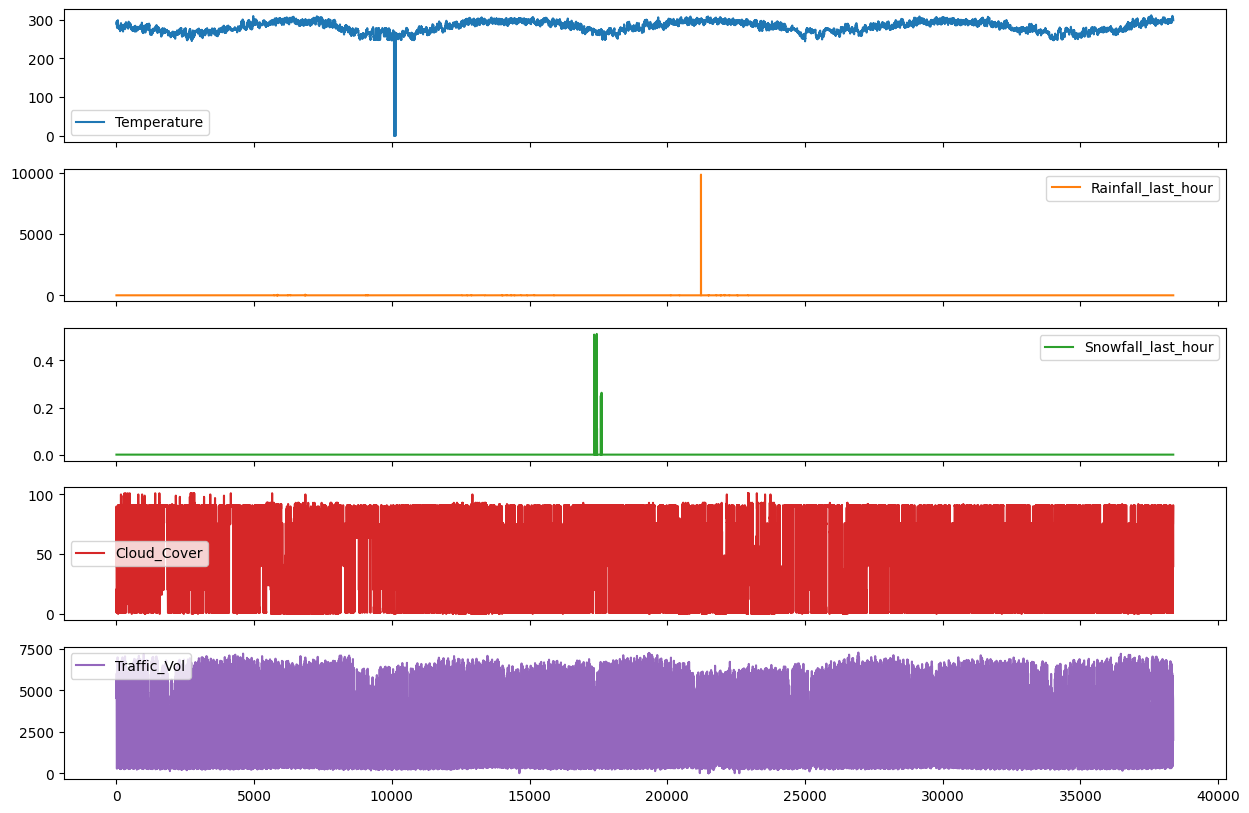

In [8]:
df[['Temperature', 'Rainfall_last_hour', 'Snowfall_last_hour',
       'Cloud_Cover', 'Weather', 'Weather_Desc', 'TimeStamp','Traffic_Vol']].plot(subplots=True,figsize=(15,10))

In [9]:
df=df[df['Temperature']>1]

In [10]:
df=df[df['Rainfall_last_hour']<5000]

In [11]:
df=df[df['Snowfall_last_hour']<0.1]

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

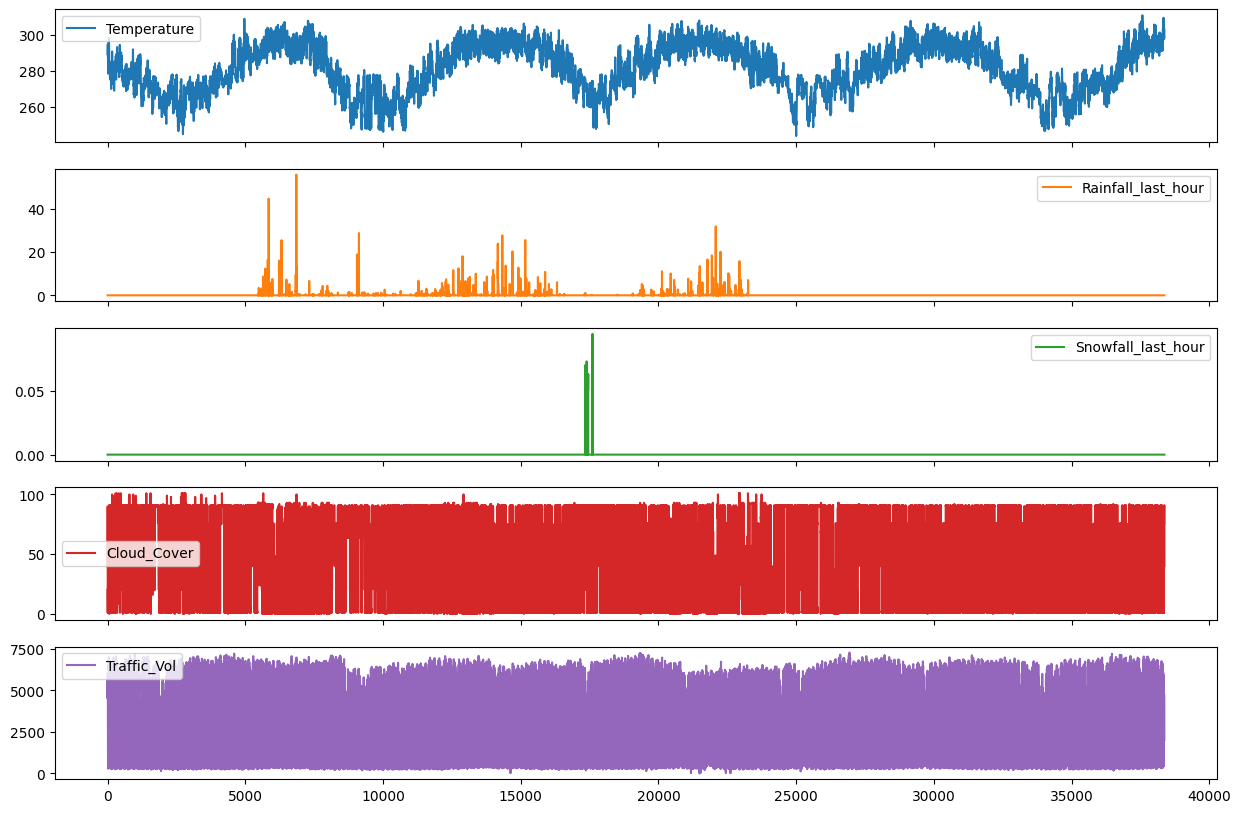

In [12]:
df[['Temperature', 'Rainfall_last_hour', 'Snowfall_last_hour',
       'Cloud_Cover', 'Weather', 'Weather_Desc', 'TimeStamp','Traffic_Vol']].plot(subplots=True,figsize=(15,10))

In [13]:
df.drop(['Date','Weather_Desc'],axis=1,inplace=True)
test_df.drop(['Date','Weather_Desc'],axis=1,inplace=True)

In [14]:
df.head()

,Holiday,Temperature,Rainfall_last_hour,Snowfall_last_hour,Cloud_Cover,Weather,TimeStamp,Traffic_Vol
0,NaN,289.28,0.0,0.0,40,Cloudy skies,02/10/08 9:00,5555
1,NaN,290.26,0.0,0.0,75,Cloudy skies,02/10/08 10:00,4525
2,NaN,290.28,0.0,0.0,90,Cloudy skies,02/10/08 11:00,4772
3,NaN,290.33,0.0,0.0,90,Cloudy skies,02/10/08 12:00,5031
4,NaN,292.14,0.0,0.0,75,Cloudy skies,02/10/08 13:00,4928


In [15]:
df.rename(columns={'Holiday': 'holiday',
                   'Temperature':'temp',
                   "Rainfall_last_hour":"rain_1h",
                  "Snowfall_last_hour"	:"snow_1h",
                   "Cloud_Cover":"clouds_all",
                  "Weather" : "weather_main",
                  # "Weather_Desc":"weather_description",
                  "TimeStamp":"date_time",
                  "Traffic_Vol":"traffic_volume"},inplace=True)



test_df.rename(columns={'Holiday': 'holiday',
                   'Temperature':'temp',
                   "Rainfall_last_hour":"rain_1h",
                  "Snowfall_last_hour"	:"snow_1h",
                   "Cloud_Cover":"clouds_all",
                  "Weather" : "weather_main",
                  # "Weather_Desc":"weather_description",
                  "TimeStamp":"date_time",
                  "Traffic_Vol":"traffic_volume"},inplace=True)





In [16]:
df['date_time'] = pd.to_datetime(df['date_time'], format="%d/%m/%y %H:%M")
df['date_month_no']= df['date_time'].dt.month
df['date_day']= df['date_time'].dt.day
df['date_hour']= df['date_time'].dt.hour
df['weekday'] = df['date_time'].dt.weekday
df['is_weekend'] = df['date_time'].dt.dayofweek // 5
df['hour_sin'] = np.sin(2 * np.pi * df['date_hour'] / 24)
df['hour_cos'] = np.cos(2 * np.pi * df['date_hour'] / 24)
df['weekday_sin'] = np.sin(2 * np.pi * df['weekday'] / 7)
df['weekday_cos'] = np.cos(2 * np.pi * df['weekday'] / 7)
df['date_day_sin'] = np.sin(2 * np.pi * df['date_day'] / 30.5)
df['date_day_cos'] = np.cos(2 * np.pi * df['date_day'] / 30.5)
df['day_of_year'] = df['date_time'].dt.dayofyear
df['day_of_year_sin'] = np.sin(2 * np.pi * df['day_of_year'] / 365.2425)
df['day_of_year_cos'] = np.cos(2 * np.pi * df['day_of_year'] / 365.2425)

In [17]:
test_df['date_time'] = pd.to_datetime(test_df['date_time'], format="%d/%m/%y %H:%M")
test_df['date_month_no']= test_df['date_time'].dt.month
test_df['date_day']= test_df['date_time'].dt.day
test_df['date_hour']= test_df['date_time'].dt.hour
test_df['weekday'] = test_df['date_time'].dt.weekday
test_df['is_weekend'] = test_df['date_time'].dt.dayofweek // 5
test_df['hour_sin'] = np.sin(2 * np.pi * test_df['date_hour'] / 24)
test_df['hour_cos'] = np.cos(2 * np.pi * test_df['date_hour'] / 24)
test_df['weekday_sin'] = np.sin(2 * np.pi * test_df['weekday'] / 7)
test_df['weekday_cos'] = np.cos(2 * np.pi * test_df['weekday'] / 7)
test_df['date_day_sin'] = np.sin(2 * np.pi * test_df['date_day'] / 30.5)
test_df['date_day_cos'] = np.cos(2 * np.pi * test_df['date_day'] / 30.5)
test_df['day_of_year'] = test_df['date_time'].dt.dayofyear
test_df['day_of_year_sin'] = np.sin(2 * np.pi * test_df['day_of_year'] / 365.2425)
test_df['day_of_year_cos'] = np.cos(2 * np.pi * test_df['day_of_year'] / 365.2425)

In [18]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,date_time,traffic_volume,date_month_no,date_day,...,is_weekend,hour_sin,hour_cos,weekday_sin,weekday_cos,date_day_sin,date_day_cos,day_of_year,day_of_year_sin,day_of_year_cos
0,NaN,289.28,0.0,0.0,40,Cloudy skies,2008-10-02 09:00:00,5555,10,2,...,0,7.071068e-01,-0.707107,0.433884,-0.900969,0.400454,0.916317,276,-0.999367,0.03557
1,NaN,290.26,0.0,0.0,75,Cloudy skies,2008-10-02 10:00:00,4525,10,2,...,0,5.000000e-01,-0.866025,0.433884,-0.900969,0.400454,0.916317,276,-0.999367,0.03557
2,NaN,290.28,0.0,0.0,90,Cloudy skies,2008-10-02 11:00:00,4772,10,2,...,0,2.588190e-01,-0.965926,0.433884,-0.900969,0.400454,0.916317,276,-0.999367,0.03557
3,NaN,290.33,0.0,0.0,90,Cloudy skies,2008-10-02 12:00:00,5031,10,2,...,0,1.224647e-16,-1.000000,0.433884,-0.900969,0.400454,0.916317,276,-0.999367,0.03557
4,NaN,292.14,0.0,0.0,75,Cloudy skies,2008-10-02 13:00:00,4928,10,2,...,0,-2.588190e-01,-0.965926,0.433884,-0.900969,0.400454,0.916317,276,-0.999367,0.03557


In [19]:
df = df.drop(columns=["holiday","date_time"])
test_df = test_df.drop(columns=["holiday","date_time"])

In [20]:
weather_unique=test_df['weather_main'].unique()
# weather_description_unique=test_df['weather_description'].unique()
df=df[df['weather_main'].isin(weather_unique)]
df = pd.get_dummies(df, columns=['weather_main']).astype(float)
test_df = pd.get_dummies(test_df, columns=['weather_main']).astype(float)

In [21]:
y = df['traffic_volume']
feature_names =df.columns.drop("traffic_volume")
x=feature_names

In [29]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import RFECV
from xgboost import XGBRegressor
import pandas as pd

# Assuming `df` is the DataFrame with features and `y` is the target variable
# Replace 'feature_names' with your actual feature columns if needed
x = df[feature_names]

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the model for feature selection and evaluation
model = XGBRegressor(random_state=42)

# Initialize RFECV for feature selection
rfecv = RFECV(
    estimator=model,
    step=1,  # Eliminate one feature at a time
    scoring='r2',  # Use R^2 as the scoring metric
    cv=5,  # 5-fold cross-validation
    n_jobs=-1  # Utilize all available CPU cores
)

# Perform feature selection
rfecv.fit(x_train, y_train)

# Selected features
selected_features_mask = rfecv.support_  # Boolean mask of selected features
selected_features = x.columns[selected_features_mask]  # Names of selected features

# Print the selected features
print(f"Selected Features: {list(selected_features)}")


selected_features=selected_features.tolist()[:7]
# Train the final model on selected features
x_train_selected = x_train[selected_features]
x_test_selected = x_test[selected_features]

model.fit(x_train_selected, y_train)

# Make predictions
y_pred = model.predict(x_test_selected)

# Evaluate the model
print('R^2 Score:', r2_score(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))


Selected Features: ['date_month_no', 'date_hour', 'weekday', 'hour_sin', 'hour_cos', 'weekday_sin', 'weekday_cos', 'date_day_sin', 'day_of_year', 'day_of_year_sin', 'day_of_year_cos']
R^2 Score: 0.9435502354167961
Mean Squared Error: 225145.0044742213


In [23]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.1 MB/s eta 0:00:00


In [30]:
from catboost import CatBoostRegressor
model2=CatBoostRegressor(verbose=False,random_state=42)
model2.fit(x_train_selected,y_train)

In [31]:
x_hack=test_df[x_train_selected.columns.tolist()]

In [32]:
y_hack=model2.predict(x_hack)

In [33]:
y_hack

array([1418.06743139,  908.10625434,  666.28231338, ..., 2391.60537909,
       1796.86925595, 1363.56008719])

In [34]:
pd.DataFrame(y_hack,columns=["Traffic_Vol"]).to_csv("submission_hack_cat_boost.csv",index=False)